In [1]:
import pandas as pd
import requests
import bs4
import requests
import time

In [2]:
df = pd.read_csv("it-jobs.csv")
df.sample(5)

,Unnamed: 0,id,title,city,company,remote,experience,published,salary_from,salary_to,salary_currency,source,company_logo
2911,3592,https://jobsforgeek.com/job-offers/details/150002,Java React.js Developer,WROCŁAW,SII SP. Z O.O.,False,mid,2020-01-23,15000.0,21000.0,PLN,J4G,NaN
2188,2507,https://nofluffjobs.com/job/junior-it-support-...,Junior IT Support Specialist,WARSZAWA,SII POLSKA,False,"junior,trainee",2020-03-10,3000.0,4500.0,PLN,NFJ,http://nofluffjobs.com/upload/listing/Sii_2017...
1840,2158,https://nofluffjobs.com/job/software-engineer-...,Software Engineer,KRAKÓW,GUIDEWIRE SOFTWARE,False,mid,2020-02-24,12000.0,18000.0,PLN,NFJ,http://nofluffjobs.com/upload/listing/Guidewir...
2441,2789,https://jobsforgeek.com/job-offers/details/193248,PHP Developer,SWIDNICA,RST SP. Z O.O. SP. K.,False,mid,2020-03-04,8000.0,13500.0,PLN,J4G,NaN
1302,1620,https://nofluffjobs.com/job/remote-or-office-d...,Remote or Office DevOps Engineer,ZDALNIE,SEMANTIVE,True,"senior,mid",2020-02-27,8500.0,13600.0,PLN,NFJ,http://nofluffjobs.com/upload/listing/Semantiv...


In [3]:
%matplotlib inline

# Rekrutujący (firmy/firmy HR)

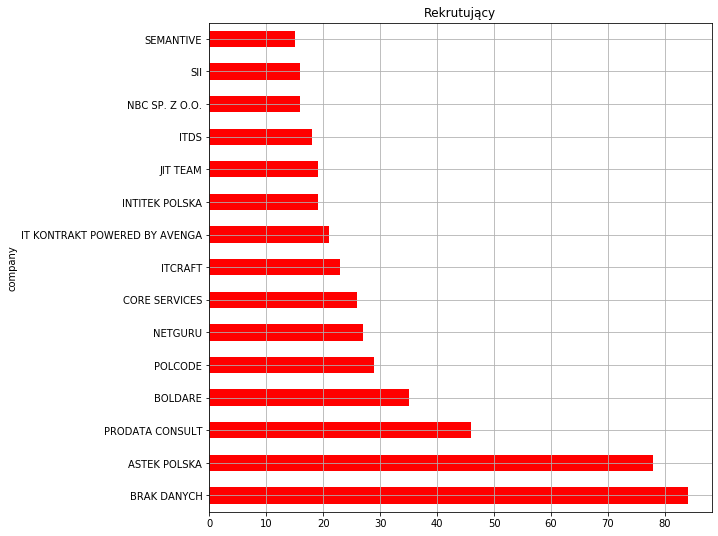

In [4]:
df.company.replace("-",'BRAK DANYCH', inplace=True)
df.groupby('company').size().\
        sort_values(ascending=False).head(15).plot(kind='barh', grid=True, figsize=(9,9), color='red', title='Rekrutujący')

# Ogłoszenie wg. technologii

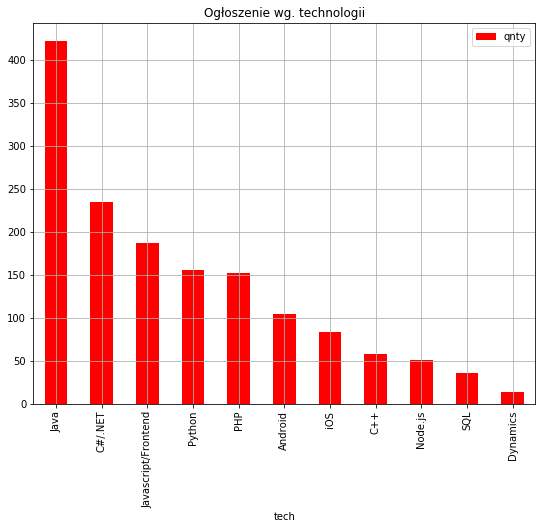

In [5]:
techs = []
techs.append(('C++',))
techs.append(('Dynamics',))
techs.append(('Python',))
techs.append(('PHP',))
techs.append(('Node.js',))
techs.append(('C#/.NET',))
techs.append(('Javascript/Frontend','Java'))
techs.append(('Java',))
techs.append(('SQL',))
techs.append(('Android',))
techs.append(('iOS',))

results = []

def calc_tech(line):
    line = line.replace("+","\\+")
    return df[df.title.str.contains(line, case=False)].shape
    
for tech in techs:
    lines = tech[0].split("/")
    sum_ = 0
    for line in lines:
        line = line.strip()
        x = calc_tech(line)
        sum_ += x[0]
    if len(tech)>1:
        calc_tech(tech[1])
        
    #print(tech[0], x[0], sep="|")
    results.append({ "tech":tech[0], "qnty":x[0] })

df_tech = pd.DataFrame(results).sort_values('qnty', ascending=False)
df_tech.set_index('tech').plot(kind='bar', figsize=(9,7), color='red', grid=True, title='Ogłoszenie wg. technologii')

# Rozkład zarobków

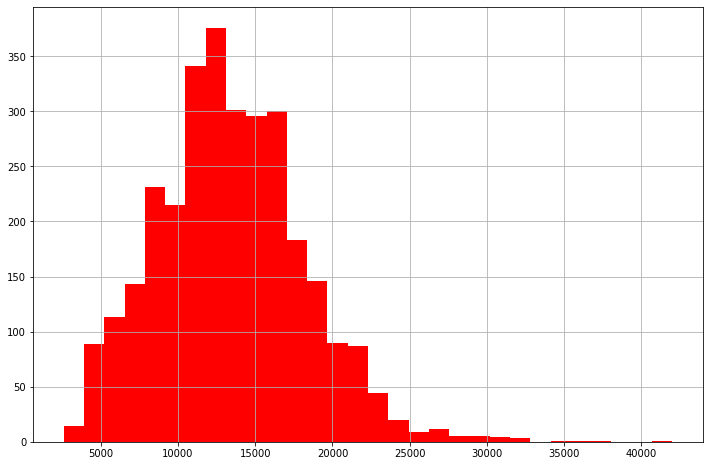

In [7]:
df["salary_avg"] = (df.salary_from+df.salary_to)/2
df["salary_avg"].hist(bins=30, figsize=(12,8), color='red')

# Mediana i średnia

In [8]:
df["salary_avg"].mean(), df["salary_avg"].median()

(13404.871989442428, 13000.0)

# Ogłoszenia wg. miast

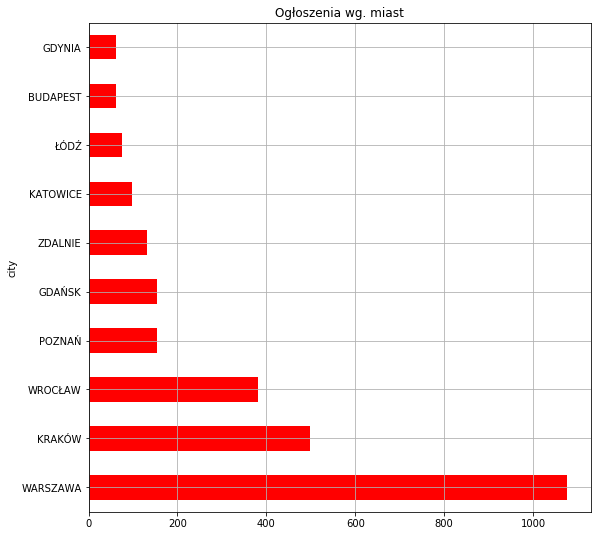

In [9]:
df.groupby('city').size().\
        sort_values(ascending=False).head(10).plot(kind='barh', grid=True, figsize=(9,9), color='red', title='Ogłoszenia wg. miast')

# Podział wg. kryterium - tylko praca zdalna

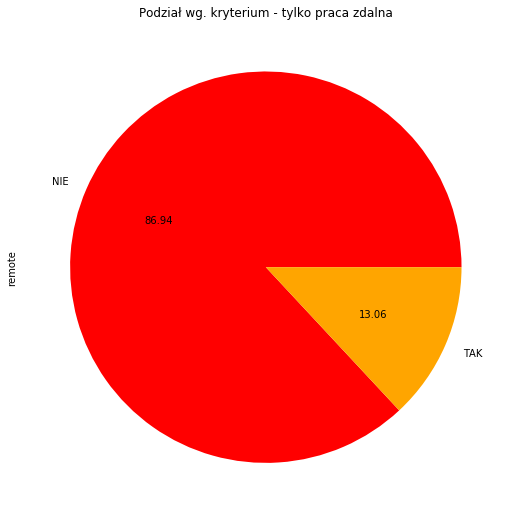

In [11]:
df.remote.replace([False,True],['NIE','TAK']).\
        value_counts().plot.pie(autopct='%.2f', figsize=(9,9), colors=['red','orange'], title='Podział wg. kryterium - tylko praca zdalna')